In [1]:
import numpy as np 
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib

C:\Users\Roderick\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Roderick\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Roderick\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#caminho onde os arquivos estao na internet

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
wd = os.getcwd()

In [4]:
wd

'C:\\PowerBi\\python teste'

In [5]:
HOUSING_PATH

'datasets\\housing'

In [6]:
# funcao para criar diretorios datasets e housing armazenando o arquivo house tgz e extraindo o csv

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
#funcao para abrir o arquvi housing.csv podendo armazenar em uma variavel

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
#executando a funcao de salvar o aruivos e armazenando ele na variavel data

fetch_housing_data()
data = load_housing_data()

In [9]:
#Mostrando a Parte de cima do Dataframe
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
#Mostrando a partde debaixo do Dataframe
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [11]:
#mostrando os valor unicos da coluna Ocean Proximity
data['ocean_proximity'].unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
#informacoes gerais dos Dados, Nota-se que Coluna total_bedrooms tem dados Na e todas sao do tipo floatm menos a ocean_proxymity
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
#mostrando a quantidade  de dados para cade tipo de opcao para a coluna ocean_proximity
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

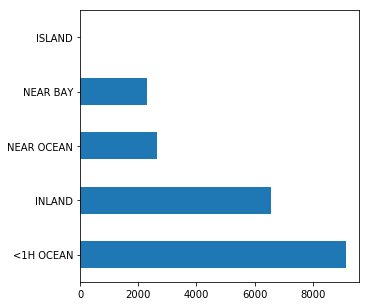

In [14]:
#Plotando a coluna ocena_proximy em graficos de barras na posicao horizontal
data['ocean_proximity'].value_counts().plot(kind="barh",figsize=(5,5))

In [15]:
#usando funcao describe que oferece informacoes estatisticas rapidas do dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


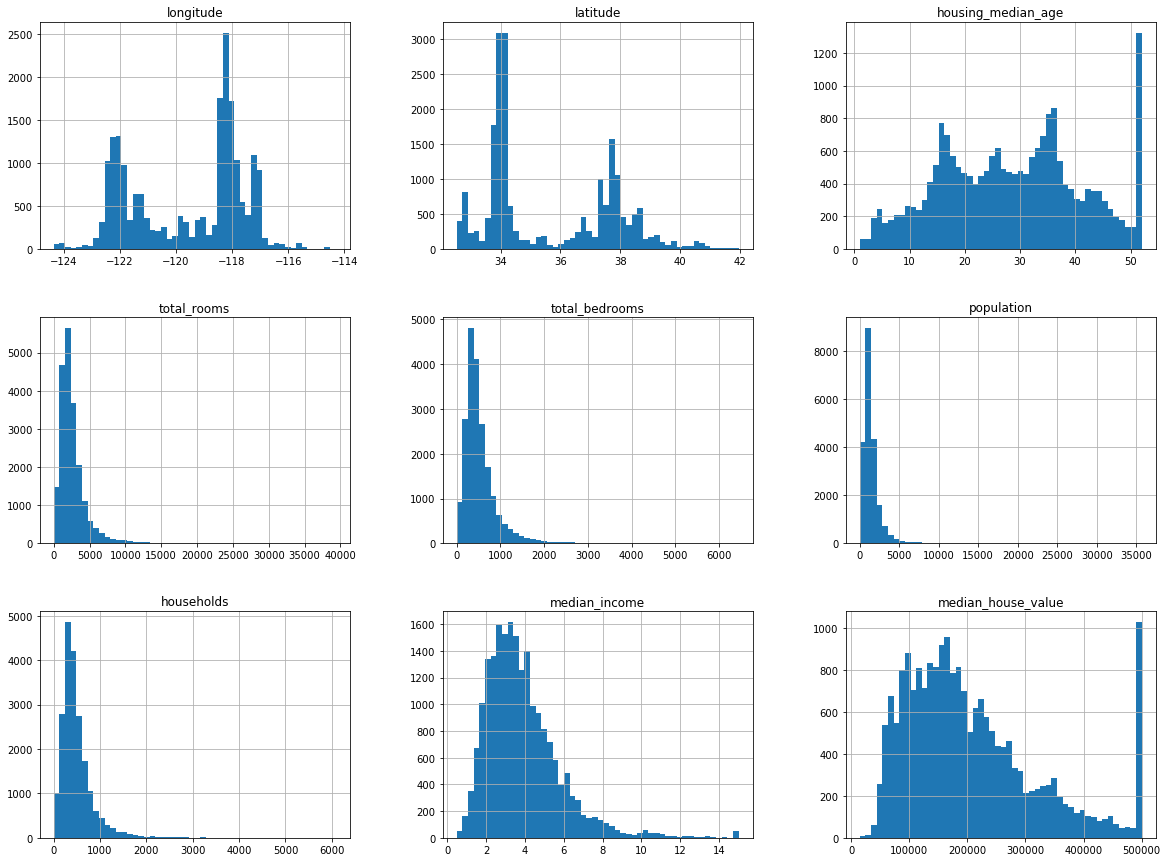

In [16]:
#Plotando histogramas de cada coluna do Dataset

data.hist(bins=50, figsize=(20,15))
plt.show()

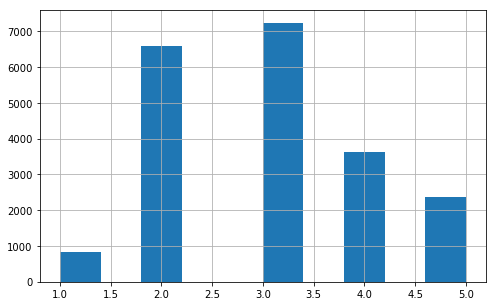

In [17]:
#divide a coluna median_income em 5 agrupamentos

data['median_income_cat'] = pd.cut(data['median_income'],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])
data['median_income_cat'].hist(figsize = (8,5))

In [18]:
#Criando 2 dataset, um com a label ou alvo e outro com as features.

y = data['median_house_value']
X = data.drop('median_house_value', axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [19]:
#importando o modo de dividir o dataset em treino e teste, assim esscolhe o Dataset data, 20% para o dataset de test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size= 0.33, random_state=42)

In [20]:
#Mostrando o data set da divisao apenas do X_treino
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_income_cat
5088,-118.28,33.98,19.0,883.0,313.0,726.0,277.0,0.9809,<1H OCEAN,1
17096,-122.23,37.46,33.0,2643.0,464.0,1015.0,427.0,4.2232,NEAR OCEAN,3
5617,-118.26,33.79,42.0,1162.0,264.0,1044.0,241.0,3.5488,<1H OCEAN,3
20060,-119.26,35.87,24.0,1590.0,390.0,1686.0,372.0,1.6469,INLAND,2
895,-121.96,37.54,14.0,5106.0,1207.0,2738.0,1108.0,3.9909,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,5
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,3
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,2
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,4


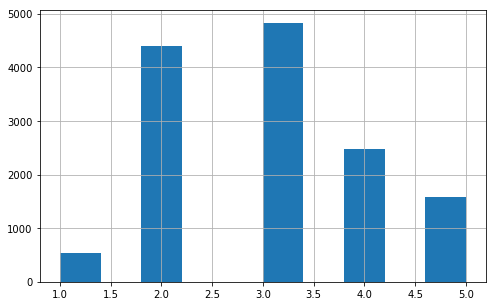

In [21]:

X_train['median_income_cat'].hist(figsize=(8,5))

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
#fazendo a destribuicao estratificada dos dados de acordo com a coluna selecionada, que tenta seguir na mesma distribuicao 
#do data set de origem

split = StratifiedShuffleSplit(n_splits=1, test_size=0.33,random_state=42)
for train_index, test_index in split.split(data,data['median_income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

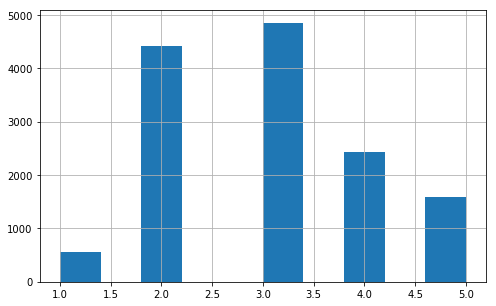

In [24]:
#mostrando o histograma do dataset estratificado que se parece bem com o primeiro nao estratificado

strat_train_set["median_income_cat"].hist(figsize=(8,5))

In [25]:
#mostra que as proporcoes do strat_test_set esta parecida com a do dataset original 

strat_test_set["median_income_cat"].value_counts() / len(strat_test_set)

3    0.350558
2    0.318849
4    0.176307
5    0.114504
1    0.039783
Name: median_income_cat, dtype: float64

In [26]:
#mostrando do dataset nao estratificado, seguem bem parecidos os dois

data['median_income_cat'].value_counts()/ len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: median_income_cat, dtype: float64

In [27]:
#apos a avaliacao apenas como analise exploratoria tiramos eles do dataset
strat_train_set.drop("median_income_cat",axis=1,inplace=True)
strat_test_set.drop("median_income_cat",axis=1,inplace=True)

In [28]:
#for set_ in (strat_test_set,strat_train_set):
#    set_.drop('median_income_cat',axis=1,inplace=True)

In [29]:
#Fazendo a copia do dataset treino estratificado para data2
data2 = strat_train_set.copy()

In [30]:
#mostrando o data2

data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,88300.0,INLAND
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,162500.0,<1H OCEAN
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,95100.0,<1H OCEAN
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,183900.0,<1H OCEAN
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,341900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,200200.0,INLAND
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,308300.0,<1H OCEAN
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,344200.0,<1H OCEAN
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,253800.0,NEAR OCEAN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEAD660978>,
      dtype=object)

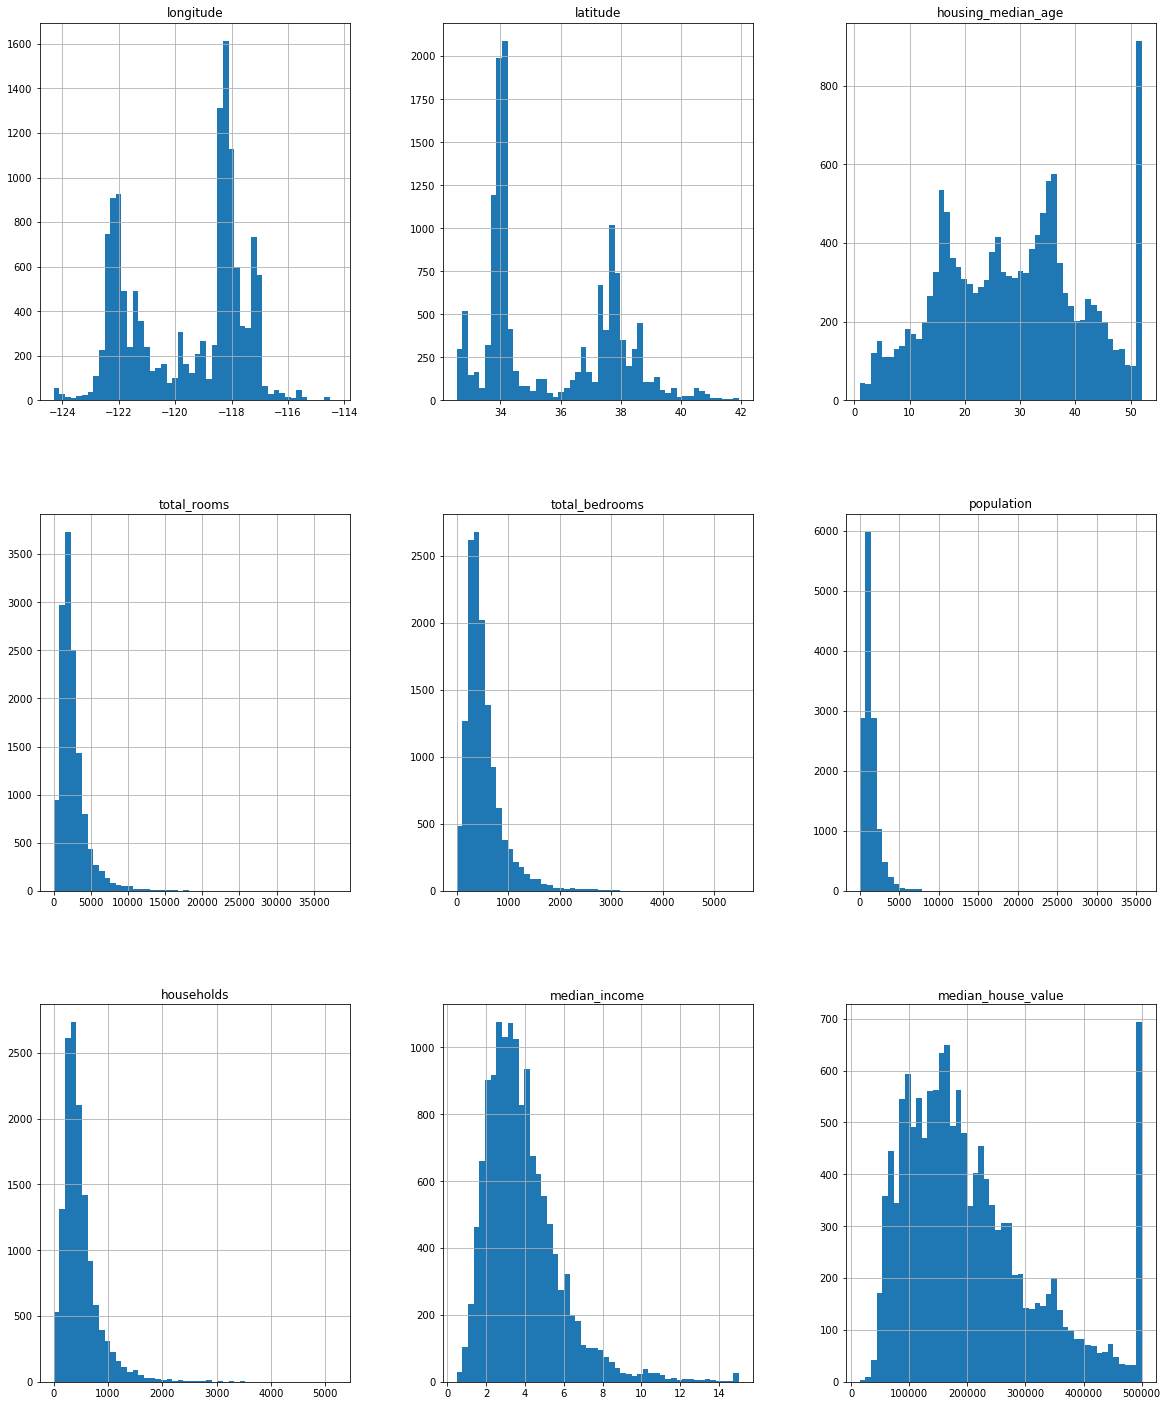

In [31]:
data2.hist(bins=50, figsize=(20,25))

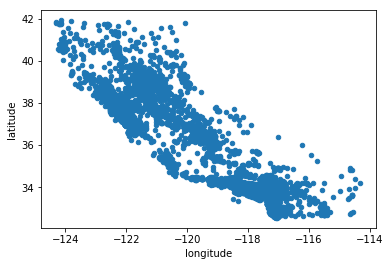

In [32]:
#mostrando um mapa de dispersao ao longo da latitude e longitude

data2.plot(kind="scatter", x='longitude', y='latitude')

In [33]:
#testando criacao de um id combinando latitude e longitude

housing_with_id = data.reset_index() 
housing_with_id["id"] = data2["longitude"] * 1000 + data2["latitude"]

In [34]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,-121280.57


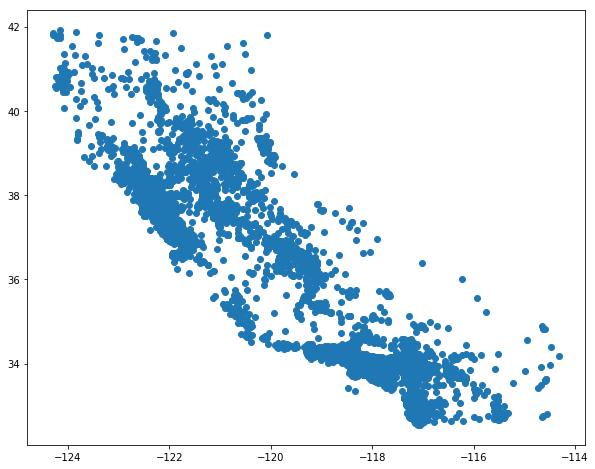

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(x=data2["longitude"],y=data2['latitude'])

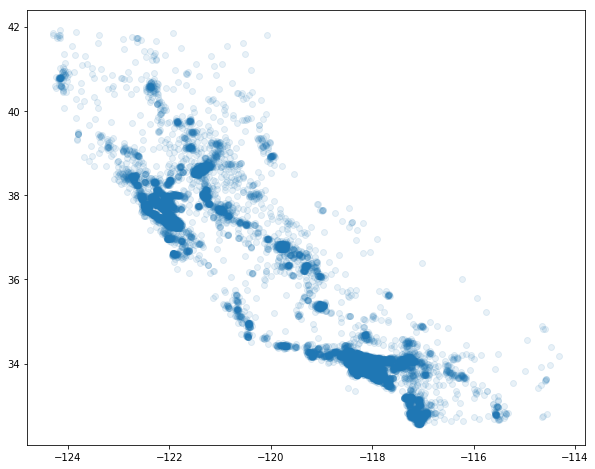

In [36]:
#mostrando que os dados estao sobrepostos, assim concentrados mais em determinados lugares.

plt.figure(figsize=(10,8))
plt.scatter(x=data2["longitude"],y=data2['latitude'],alpha=0.1)


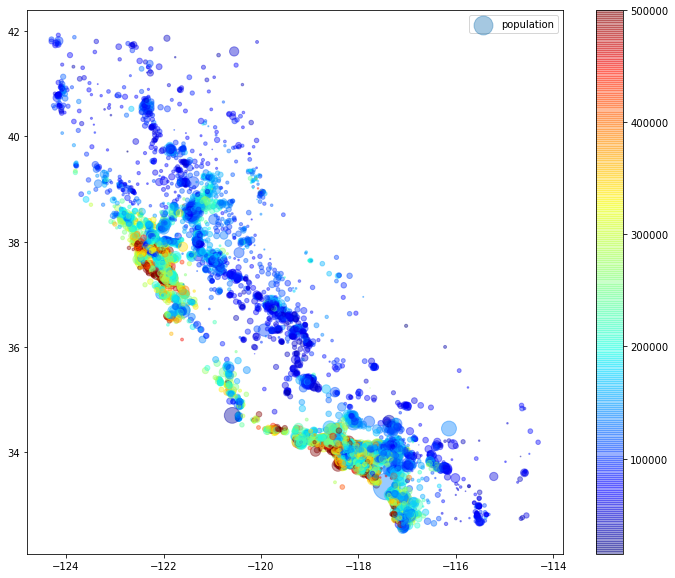

In [37]:
#usango matplotlib para criar mapa de calor mostrando as areas mais densas
plt.figure(figsize=(12,10))
plt.scatter(x=data2["longitude"], y=data2['latitude'],cmap=plt.get_cmap('jet'),alpha=.4,
            s=data2['population']/50,c=data2['median_house_value'],
            label="population")
plt.colorbar()
plt.legend()

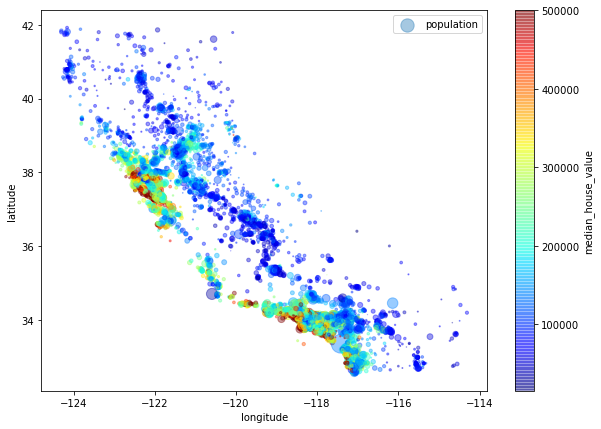

In [38]:
#plotando de outra forma.
data2.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=data2["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [39]:
#criando e plotando uma matriz de correlacao entre as colunas  a medida target, valor medio das casas.
corr_matrix = data2.corr()

In [40]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688935
total_rooms           0.135076
housing_median_age    0.117018
households            0.064619
total_bedrooms        0.047784
population           -0.025524
longitude            -0.052886
latitude             -0.138196
Name: median_house_value, dtype: float64

In [41]:
import seaborn as sns
#plot correlacao grafico colorido no seaborn, esta dando algum erro, corrigir depois!
#corr = data2.corr()
#mask = np.triu(np.ones_like(corr, dtype = bool))
#f, ax = plt.subplots(figsize=(11,9))
#cmap = sns.diverging_palette(230,20,as_cmap= True)
#sns.heatmap(corr, mask=mask, cmap= cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [42]:
#passando os dataset estratificados dividindo nos target e nas features.
housing2 = strat_train_set.drop('median_house_value', axis=1)
housing2_label = strat_train_set["median_house_value"].copy()

In [43]:
housing2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,INLAND
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,<1H OCEAN
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,<1H OCEAN
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,<1H OCEAN
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,INLAND
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,<1H OCEAN
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,<1H OCEAN
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,NEAR OCEAN


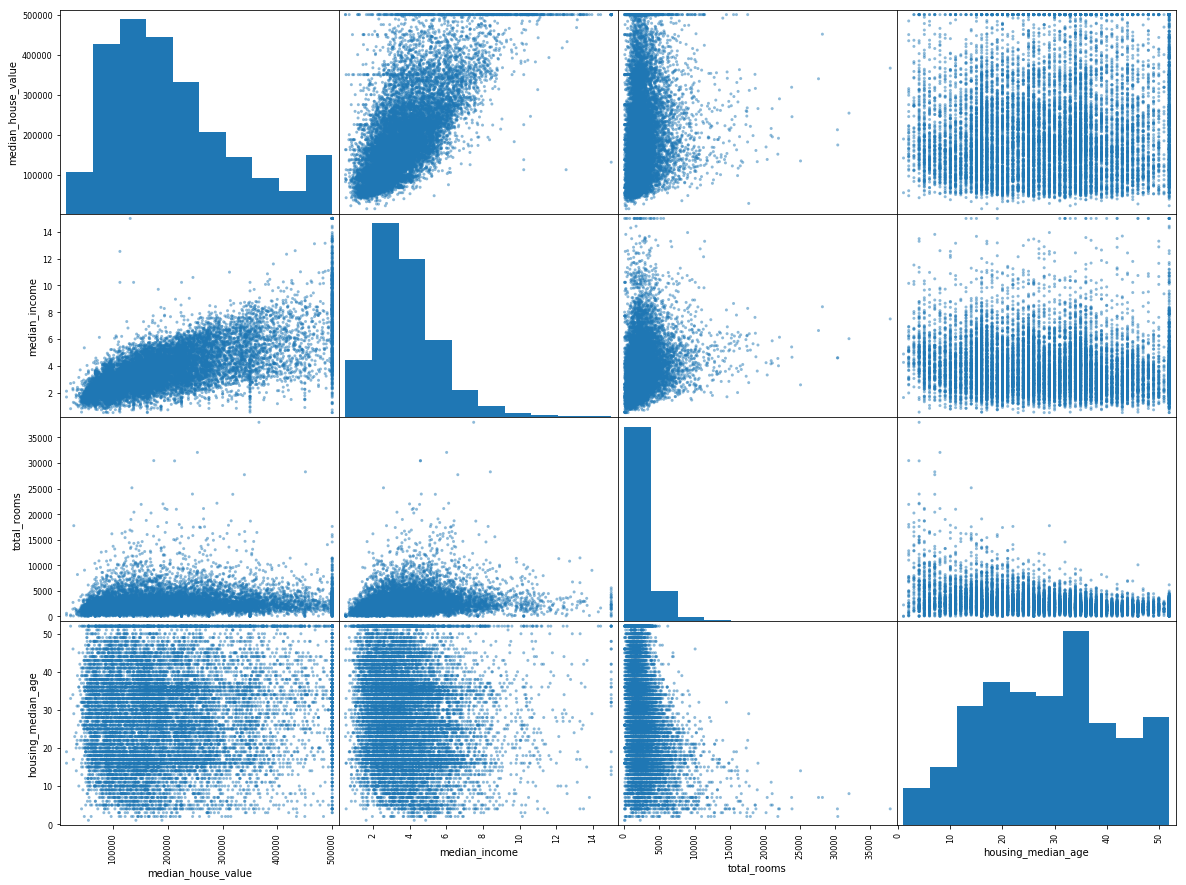

In [44]:
#fazendo uma matriz de dispersao  mostrando a correlacao entre algumas fetures e a medida target
#percebendo assim que a feature median_income possui a maior correlacao positiva.

from pandas.plotting import scatter_matrix
atributos = ['median_house_value','median_income', 'total_rooms','housing_median_age']
scatter_matrix(data2[atributos],figsize=(20,15))
plt.show()

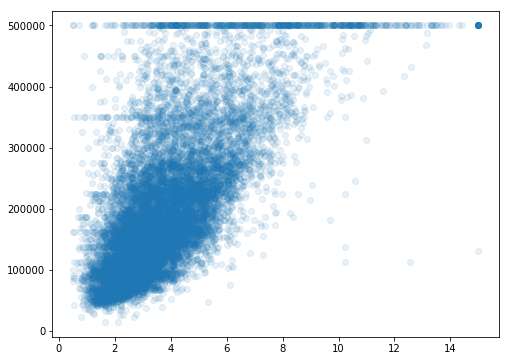

In [45]:
#mostrando separadamente
plt.figure(figsize=(8,6))
plt.scatter(data=data2,x='median_income',y='median_house_value',alpha=0.1)

In [46]:
#criando novas features para o dataset e mostrando como elas se correlacionam

data2["rooms_per_households"] = data2["total_rooms"] / data2['households']
data2['bedrooms_per_room'] = data2['total_rooms'] / data2['total_bedrooms']
data2['population_per_households'] = data2['population'] / data2['households']
data2['incomin_households'] = data2['median_income'] / data2['households']


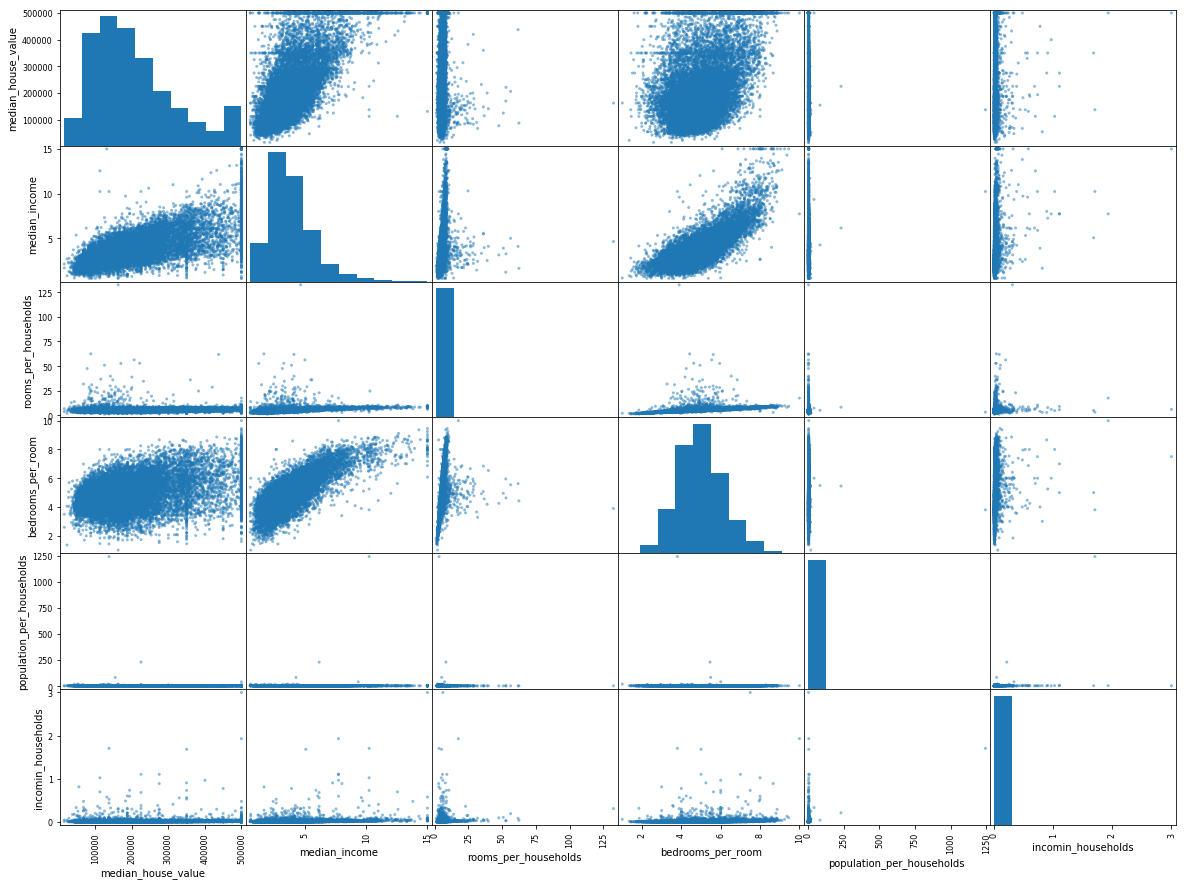

In [47]:
atributos = ['median_house_value','median_income',"rooms_per_households",'bedrooms_per_room','population_per_households','incomin_households']
scatter_matrix(data2[atributos],figsize=(20,15))
plt.show()

In [48]:
corr_matrix = data2.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688935
bedrooms_per_room            0.386383
rooms_per_households         0.148673
total_rooms                  0.135076
housing_median_age           0.117018
incomin_households           0.098134
households                   0.064619
total_bedrooms               0.047784
population_per_households   -0.023602
population                  -0.025524
longitude                   -0.052886
latitude                    -0.138196
Name: median_house_value, dtype: float64

In [49]:
#voltando a trabalhar com os dados  stratificados anteriores

housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [50]:
#tratando dados faltantes

In [51]:
#mostrando apenas alguns dados da parte de cima onda existem dados faltantes

linhas_incompletas = housing[housing.isnull().any(axis=1)].head()
linhas_incompletas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,NaN,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN


In [52]:
linhas_incompletas.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [53]:
linhas_incompletas.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,3795.0,1179.0,1.2254,<1H OCEAN


In [54]:
#calculando a media da coluna total bedrooms e depois preenchendo os dados faltantes com a media
median = housing['total_bedrooms'].median()
median

429.5

In [55]:
linhas_incompletas['total_bedrooms'].fillna(median,inplace = True)
linhas_incompletas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,429.5,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,429.5,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,429.5,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,429.5,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,429.5,3795.0,1179.0,1.2254,<1H OCEAN


In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,13828.000000,13828.000000,13828.000000,13828.000000,13696.000000,13828.000000,13828.000000,13828.000000
mean,-119.573139,35.635013,28.784423,2612.115346,532.956849,1413.457622,494.736404,3.871448
std,1.998889,2.130192,12.562422,2130.729513,412.948558,1117.802140,374.719191,1.892099
min,-124.300000,32.550000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1437.000000,293.750000,779.000000,278.000000,2.563850
50%,-118.520000,34.260000,29.000000,2106.000000,429.500000,1158.000000,405.000000,3.533000
75%,-118.010000,37.710000,37.000000,3119.000000,640.000000,1706.000000,597.000000,4.742725
max,-114.310000,41.920000,52.000000,37937.000000,5471.000000,35682.000000,5189.000000,15.000100


In [57]:
#testando algumas formas de contar  os numeros de dados faltantes
dados_faltantes = housing[housing.isnull().any(axis=1)]
len(dados_faltantes)

132

In [58]:
count = 0
for x in housing['total_bedrooms']:
    if np.isnan(x):
        count += 1 
print(count)

132


In [59]:
count = 0
for x in data2['total_bedrooms']:
    if np.isnan(x):
        count += 1 
print(count)

132


In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 13325 to 11752
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13828 non-null  float64
 1   latitude            13828 non-null  float64
 2   housing_median_age  13828 non-null  float64
 3   total_rooms         13828 non-null  float64
 4   total_bedrooms      13696 non-null  float64
 5   population          13828 non-null  float64
 6   households          13828 non-null  float64
 7   median_income       13828 non-null  float64
 8   ocean_proximity     13828 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [61]:
count= 0
notnull=0
for item in housing['total_bedrooms']:
    if np.isnan(item) == True:
        count += 1 
    else:
        notnull +=1
print(notnull)
print(count)

13696
132


In [62]:
#tratantdo os dados faltantes de uma melhor maneira, escolhendo um intervalo de dados especifico
from sklearn.impute import  SimpleImputer

In [63]:
imputer = SimpleImputer(strategy="median")

In [64]:
imputer.strategy

'median'

In [65]:
#duas maneiras de selecionar apenas as colunas numericas

house_num = housing.drop("ocean_proximity",axis=1)
housing_num = housing.select_dtypes(include=[np.number])

In [66]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543


In [67]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 13325 to 11752
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13828 non-null  float64
 1   latitude            13828 non-null  float64
 2   housing_median_age  13828 non-null  float64
 3   total_rooms         13828 non-null  float64
 4   total_bedrooms      13696 non-null  float64
 5   population          13828 non-null  float64
 6   households          13828 non-null  float64
 7   median_income       13828 non-null  float64
dtypes: float64(8)
memory usage: 972.3 KB


In [68]:
#preenchendo o imppute com os dados somente numericos

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [69]:
imputer.statistics_

array([-118.52 ,   34.26 ,   29.   , 2106.   ,  429.5  , 1158.   ,
        405.   ,    3.533])

In [70]:
housing_num.median().values

array([-118.52 ,   34.26 ,   29.   , 2106.   ,  429.5  , 1158.   ,
        405.   ,    3.533])

In [71]:
housing_num2 = housing_num.copy()

In [72]:
#transformando os dados para a media deles
X = imputer.transform(housing_num)

In [73]:
X

array([[-1.1763e+02,  3.4060e+01,  3.9000e+01, ...,  1.2940e+03,
         3.0300e+02,  2.3636e+00],
       [-1.1896e+02,  3.4190e+01,  1.6000e+01, ...,  5.8700e+02,
         2.9600e+02,  1.9811e+00],
       [-1.1823e+02,  3.3930e+01,  2.3000e+01, ...,  6.1000e+02,
         1.2600e+02,  1.4861e+00],
       ...,
       [-1.1842e+02,  3.4010e+01,  2.9000e+01, ...,  9.6000e+02,
         4.4900e+02,  3.6611e+00],
       [-1.2192e+02,  3.6610e+01,  2.9000e+01, ...,  1.8730e+03,
         7.5700e+02,  3.1543e+00],
       [-1.2121e+02,  3.8760e+01,  1.6000e+01, ...,  7.9200e+02,
         2.8600e+02,  3.1583e+00]])

In [74]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [75]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543


In [76]:
#mostrando que agora nao existe mais dados nulos
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 13325 to 11752
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13828 non-null  float64
 1   latitude            13828 non-null  float64
 2   housing_median_age  13828 non-null  float64
 3   total_rooms         13828 non-null  float64
 4   total_bedrooms      13828 non-null  float64
 5   population          13828 non-null  float64
 6   households          13828 non-null  float64
 7   median_income       13828 non-null  float64
dtypes: float64(8)
memory usage: 972.3 KB


In [77]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000,13828.000000
mean,-119.573139,35.635013,28.784423,2612.115346,531.969265,1413.457622,494.736404,3.871448
std,1.998889,2.130192,12.562422,2130.729513,411.095826,1117.802140,374.719191,1.892099
min,-124.300000,32.550000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1437.000000,294.000000,779.000000,278.000000,2.563850
50%,-118.520000,34.260000,29.000000,2106.000000,429.500000,1158.000000,405.000000,3.533000
75%,-118.010000,37.710000,37.000000,3119.000000,637.000000,1706.000000,597.000000,4.742725
max,-114.310000,41.920000,52.000000,37937.000000,5471.000000,35682.000000,5189.000000,15.000100


In [78]:
#Manuseando Texto E Atributor Categoricos

In [79]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [80]:
#mostrando a coluna categorica
housing_cat = housing[['ocean_proximity']]

In [81]:
housing_cat[:10]

,ocean_proximity
13325,INLAND
20355,<1H OCEAN
7481,<1H OCEAN
15465,<1H OCEAN
18116,<1H OCEAN
1031,INLAND
16745,NEAR OCEAN
18152,<1H OCEAN
13744,INLAND
6085,<1H OCEAN


In [82]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [83]:
#unsando o meteodo Ordinal Enconder do sklearn, onde se estabelece uma relacao de valor entreas categorias assin o valores 
#vao de 0 a 4 ou sejam, 5 categorias
OE = preprocessing.OrdinalEncoder()

In [84]:
housing_encoded_cat = OE.fit_transform(housing_cat)

In [85]:
housing_encoded_cat[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.],
       [1.],
       [0.]])

In [86]:
list(OE.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [87]:
#usando outro metodo o One Hot Encoder, no qual nao cria uma relevancia dos valores
from sklearn.preprocessing import OneHotEncoder
cat_enconder = OneHotEncoder()
housing_cat_1hot = cat_enconder.fit_transform(housing_encoded_cat.reshape(-1,1))
housing_cat_1hot

<13828x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13828 stored elements in Compressed Sparse Row format>

In [88]:
#mostrando assim onde naquela linha relaciona com a categoria selecionada  fica o numero 1 e 0 pois nao tem relacao
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [89]:
teste = housing_cat_1hot.toarray()

In [90]:
teste[1]

array([1., 0., 0., 0., 0.])

In [91]:
#criando uma funcao para adicionar novas colunas no dataset

def feature_engineering(data):
    data["rooms_per_households"] = data["total_rooms"] / data['households']
    data["bedrooms_per_households"] = data["total_bedrooms"] / data["households"]
    data['bedrooms_per_room'] = data['total_rooms'] / data['total_bedrooms']
    data['population_per_households'] = data['population'] / data['households']
    data['incomin_households'] = data['median_income'] / data['households']

    return data

In [92]:
house_feature_engineered = feature_engineering(housing_num2)
house_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_households,bedrooms_per_room,population_per_households,incomin_households
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,3.993399,1.023102,3.903226,4.270627,0.007801
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,6.104730,1.168919,5.222543,1.983108,0.006693
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,4.325397,1.039683,4.160305,4.841270,0.011794
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,5.334582,1.106117,4.822799,2.906367,0.004175
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,6.627329,1.018634,6.506098,2.804348,0.019748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,5.255858,0.983130,5.346044,2.432052,0.003736
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,4.572491,1.037175,4.408602,2.486989,0.014512
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,4.445434,1.089087,4.081800,2.138085,0.008154
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,4.933950,1.067371,4.622525,2.474240,0.004167


In [93]:
#outra funcao que tambem adicionar  novas colunas no dataset utilizando o numero da coluna
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix,median_income_ix = 3,4,5,6,7
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        Incoming_per_household = X[:,median_income_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household,bedrooms_per_room,Incoming_per_household]
        else:
            return np.c_[X,rooms_per_household,population_per_household,Incoming_per_household]
        

In [94]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [95]:
pd.DataFrame(housing_extra_attribs)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-117.63,34.06,39,1210,310,1294,303,2.3636,INLAND,3.9934,4.27063,0.00780066
1,-118.96,34.19,16,1807,346,587,296,1.9811,<1H OCEAN,6.10473,1.98311,0.00669291
2,-118.23,33.93,23,545,131,610,126,1.4861,<1H OCEAN,4.3254,4.84127,0.0117944
3,-117.22,33.18,13,4273,886,2328,801,3.3444,<1H OCEAN,5.33458,2.90637,0.00417528
4,-122.02,37.3,32,2134,328,903,322,6.359,<1H OCEAN,6.62733,2.80435,0.0197484
...,...,...,...,...,...,...,...,...,...,...,...,...
13823,-121.73,37.71,12,5608,1049,2595,1067,3.9864,INLAND,5.25586,2.43205,0.00373608
13824,-118.39,34.04,49,1230,279,669,269,3.9038,<1H OCEAN,4.57249,2.48699,0.0145123
13825,-118.42,34.01,29,1996,489,960,449,3.6611,<1H OCEAN,4.44543,2.13808,0.0081539
13826,-121.92,36.61,29,3735,808,1873,757,3.1543,NEAR OCEAN,4.93395,2.47424,0.00416684


In [96]:
#scaling Data

In [97]:
#sabendo que os dados estao com numero em escalas bem diferente, precisamos escalonalos pra transformas mais igualizados, para 
#melhorar na hora de  colocar no medelo de ML
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

housing_scaled = scaler.fit_transform(house_feature_engineered)
housing_scaled

array([[ 0.97214485, -0.73940276,  0.81321472, ..., -0.92872202,
         0.11294847, -0.13856688],
       [ 0.30675114, -0.6783732 , -1.01770862, ...,  0.19804227,
        -0.09912619, -0.16016784],
       [ 0.67196724, -0.80043233, -0.46047108, ..., -0.70916302,
         0.16585245, -0.06068902],
       ...,
       [ 0.57691099, -0.76287567,  0.01716109, ..., -0.77621092,
        -0.0847584 , -0.13167883],
       [-1.17412507,  0.45771563,  0.01716109, ..., -0.31440413,
        -0.05359357, -0.20942547],
       [-0.8189149 ,  1.46705074, -1.01770862, ...,  0.37729822,
        -0.02624518, -0.07534188]])

In [99]:
pd.DataFrame(housing_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.972145,-0.739403,0.813215,-0.658069,-0.539934,-0.106872,-0.511699,-0.796947,-0.595416,-0.154775,-0.928722,0.112948,-0.138567
1,0.306751,-0.678373,-1.017709,-0.377873,-0.452753,-0.739386,-0.530380,-0.999111,0.275829,0.147410,0.198042,-0.099126,-0.160168
2,0.671967,-0.800432,-0.460471,-0.970180,-0.973418,-0.718809,-0.984070,-1.260734,-0.458416,-0.120415,-0.709163,0.165852,-0.060689
3,1.177266,-1.152526,-1.256525,0.779519,0.854964,0.818191,0.817345,-0.278562,-0.041974,0.017262,-0.143360,-0.013531,-0.209261
4,-1.224155,0.781642,0.255977,-0.224399,-0.496343,-0.456678,-0.460992,1.314752,0.491481,-0.164036,1.294263,-0.022989,0.094412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,-1.079069,0.974120,-1.336130,1.406088,1.249700,1.057061,1.527235,0.060756,-0.074460,-0.237612,0.303518,-0.057505,-0.217825
13824,0.591920,-0.748792,1.609268,-0.648682,-0.615007,-0.666025,-0.602437,0.017099,-0.356452,-0.125612,-0.497105,-0.052412,-0.007692
13825,0.576911,-0.762876,0.017161,-0.289167,-0.106450,-0.405684,-0.122060,-0.111176,-0.408883,-0.018031,-0.776211,-0.084758,-0.131679
13826,-1.174125,0.457716,0.017161,0.527014,0.666071,0.411127,0.699919,-0.379036,-0.207296,-0.063034,-0.314404,-0.053594,-0.209425


In [100]:
#Criando pipeline, que permite aplicar varias oprecaoes de uma vez so dessa vez tratando os dados faltantes, criando os novos
#atributos e escalonando os dados.
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("attribs_adder",CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housin_num_tr = num_pipeline.fit_transform(housing_num2)

In [101]:
housin_num_tr

array([[ 0.97214485, -0.73940276,  0.81321472, ...,  0.11294847,
         0.64814016, -0.13856688],
       [ 0.30675114, -0.6783732 , -1.01770862, ..., -0.09912619,
        -0.34549885, -0.16016784],
       [ 0.67196724, -0.80043233, -0.46047108, ...,  0.16585245,
         0.40508567, -0.06068902],
       ...,
       [ 0.57691099, -0.76287567,  0.01716109, ..., -0.0847584 ,
         0.47606135, -0.13167883],
       [-1.17412507,  0.45771563,  0.01716109, ..., -0.05359357,
         0.03608364, -0.20942547],
       [-0.8189149 ,  1.46705074, -1.01770862, ..., -0.02624518,
        -0.45907797, -0.07534188]])

In [102]:
from sklearn.compose import ColumnTransformer

In [103]:
#criando o pipeline completo,  tratando os dados numericos e tambem tratando a coluna categoriga apliucando o one hot encoder
num_attrib = list(housing_num)
cat_attrib = ['ocean_proximity']

pipeline_completo = ColumnTransformer([
        ("num", num_pipeline,num_attrib),
        ("cat",OneHotEncoder(),cat_attrib)
])

In [104]:
num_attrib

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [105]:
cat_attrib

['ocean_proximity']

In [106]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543


In [107]:
housing_label

13325     88300.0
20355    162500.0
7481      95100.0
15465    183900.0
18116    341900.0
           ...   
994      200200.0
5377     308300.0
5448     344200.0
9813     253800.0
11752    239200.0
Name: median_house_value, Length: 13828, dtype: float64

In [108]:
#aplicando o pipeline e transformando o dataset inicial nele transformado
housing_final = pipeline_completo.fit_transform(housing)

In [109]:
pd.DataFrame(housing_final)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.972145,-0.739403,0.813215,-0.658069,-0.542530,-0.106872,-0.511699,-0.796947,-0.595416,0.112948,0.648140,-0.138567,0.0,1.0,0.0,0.0,0.0
1,0.306751,-0.678373,-1.017709,-0.377873,-0.454929,-0.739386,-0.530380,-0.999111,0.275829,-0.099126,-0.345499,-0.160168,1.0,0.0,0.0,0.0,0.0
2,0.671967,-0.800432,-0.460471,-0.970180,-0.978097,-0.718809,-0.984070,-1.260734,-0.458416,0.165852,0.405086,-0.060689,1.0,0.0,0.0,0.0,0.0
3,1.177266,-1.152526,-1.256525,0.779519,0.859074,0.818191,0.817345,-0.278562,-0.041974,-0.013531,-0.101838,-0.209261,1.0,0.0,0.0,0.0,0.0
4,-1.224155,0.781642,0.255977,-0.224399,-0.498730,-0.456678,-0.460992,1.314752,0.491481,-0.022989,-0.925457,0.094412,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,-1.079069,0.974120,-1.336130,1.406088,1.255708,1.057061,1.527235,0.060756,-0.074460,-0.057505,-0.413410,-0.217825,0.0,1.0,0.0,0.0,0.0
13824,0.591920,-0.748792,1.609268,-0.648682,-0.617963,-0.666025,-0.602437,0.017099,-0.356452,-0.052412,0.197245,-0.007692,1.0,0.0,0.0,0.0,0.0
13825,0.576911,-0.762876,0.017161,-0.289167,-0.106962,-0.405684,-0.122060,-0.111176,-0.408883,-0.084758,0.476061,-0.131679,1.0,0.0,0.0,0.0,0.0
13826,-1.174125,0.457716,0.017161,0.527014,0.669273,0.411127,0.699919,-0.379036,-0.207296,-0.053594,0.036084,-0.209425,0.0,0.0,0.0,0.0,1.0


In [110]:
housing_prepared = pipeline_completo.fit_transform(housing)

In [111]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.972145,-0.739403,0.813215,-0.658069,-0.542530,-0.106872,-0.511699,-0.796947,-0.595416,0.112948,0.648140,-0.138567,0.0,1.0,0.0,0.0,0.0
1,0.306751,-0.678373,-1.017709,-0.377873,-0.454929,-0.739386,-0.530380,-0.999111,0.275829,-0.099126,-0.345499,-0.160168,1.0,0.0,0.0,0.0,0.0
2,0.671967,-0.800432,-0.460471,-0.970180,-0.978097,-0.718809,-0.984070,-1.260734,-0.458416,0.165852,0.405086,-0.060689,1.0,0.0,0.0,0.0,0.0
3,1.177266,-1.152526,-1.256525,0.779519,0.859074,0.818191,0.817345,-0.278562,-0.041974,-0.013531,-0.101838,-0.209261,1.0,0.0,0.0,0.0,0.0
4,-1.224155,0.781642,0.255977,-0.224399,-0.498730,-0.456678,-0.460992,1.314752,0.491481,-0.022989,-0.925457,0.094412,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823,-1.079069,0.974120,-1.336130,1.406088,1.255708,1.057061,1.527235,0.060756,-0.074460,-0.057505,-0.413410,-0.217825,0.0,1.0,0.0,0.0,0.0
13824,0.591920,-0.748792,1.609268,-0.648682,-0.617963,-0.666025,-0.602437,0.017099,-0.356452,-0.052412,0.197245,-0.007692,1.0,0.0,0.0,0.0,0.0
13825,0.576911,-0.762876,0.017161,-0.289167,-0.106962,-0.405684,-0.122060,-0.111176,-0.408883,-0.084758,0.476061,-0.131679,1.0,0.0,0.0,0.0,0.0
13826,-1.174125,0.457716,0.017161,0.527014,0.669273,0.411127,0.699919,-0.379036,-0.207296,-0.053594,0.036084,-0.209425,0.0,0.0,0.0,0.0,1.0


In [112]:
housing_label

13325     88300.0
20355    162500.0
7481      95100.0
15465    183900.0
18116    341900.0
           ...   
994      200200.0
5377     308300.0
5448     344200.0
9813     253800.0
11752    239200.0
Name: median_house_value, Length: 13828, dtype: float64

In [113]:
#importando o modelo de Regressao Linear, alocando ele na variavel e alimentando o modelo.
from sklearn.linear_model import LinearRegression

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [115]:
#pegando alguns dados para exemplo
some_data = housing[:5]
some_labels = housing_label[:5]

In [116]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,INLAND
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,<1H OCEAN
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,<1H OCEAN
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,<1H OCEAN
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,<1H OCEAN


In [117]:
some_labels

13325     88300.0
20355    162500.0
7481      95100.0
15465    183900.0
18116    341900.0
Name: median_house_value, dtype: float64

In [118]:
some_data_prepared = pipeline_completo.transform(some_data)

In [119]:
#os dados depois de passar pelo pipeline completo, transformado
some_data_prepared

array([[ 0.97214485, -0.73940276,  0.81321472, -0.65806853, -0.54252972,
        -0.10687217, -0.51169874, -0.79694694, -0.59541575,  0.11294847,
         0.64814016, -0.13856688,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.30675114, -0.6783732 , -1.01770862, -0.37787267, -0.45492949,
        -0.73938623, -0.53038007, -0.99911067,  0.27582913, -0.09912619,
        -0.34549885, -0.16016784,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.67196724, -0.80043233, -0.46047108, -0.9701795 , -0.97809749,
        -0.71880939, -0.98406953, -1.26073433, -0.4584163 ,  0.16585245,
         0.40508567, -0.06068902,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.17726622, -1.15252597, -1.25652471,  0.77951927,  0.85907386,
         0.81819082,  0.8173445 , -0.27856213, -0.04197403, -0.01353135,
        -0.10183785, -0.20926093,  1.        ,  0.        ,  0.        ,
         0.        

In [120]:
#mostrando quanto foi o valor previsto e mostrando os valores reais.

some_data_predicted = lin_reg.predict(some_data_prepared)
print(f"predictions: {some_data_predicted}")

predictions: [104640.09249459 153577.11237609 109072.71794005 182063.6960378
 336155.00150645]


In [121]:
#valores reais

print("labels :", some_labels)

labels : 13325     88300.0
20355    162500.0
7481      95100.0
15465    183900.0
18116    341900.0
Name: median_house_value, dtype: float64


In [122]:
#criando um data frame para compara  os valores originais, o valor previsto  e quanto foi a diferenca

comparison_dataframe = pd.DataFrame(data={"Original_Values": some_labels, "predicted_values": some_data_predicted})
comparison_dataframe["differences"] = comparison_dataframe["Original_Values"] - comparison_dataframe["predicted_values"]
comparison_dataframe

,Original_Values,predicted_values,differences
13325,88300.0,104640.092495,-16340.092495
20355,162500.0,153577.112376,8922.887624
7481,95100.0,109072.717940,-13972.717940
15465,183900.0,182063.696038,1836.303962
18116,341900.0,336155.001506,5744.998494


In [125]:
#mostrando ma das metricas pra mostrar o Root Mean Squared Error
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(some_labels, some_data_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10753.886858669912

In [126]:
#usando uma das metricas pra mostrar o Root Mean Squared Error para outro cojunto de dados 
#mostra o valor do erro sendo assim quanto menor melhor.
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68391.1836371026

In [127]:
#mostrando o Mean Asbsolut Error melhor para quando se tem outliers
from sklearn.metrics import mean_absolute_error

lin_mae  = mean_absolute_error(some_labels, some_data_predicted)
lin_mae

9363.400102860274

In [128]:
#fazendo a predicao com modelo de Regressao de Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [129]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor()

In [130]:
#mostrando 0 de erro, provavelmente fazendo um overfit da previsao
housing_predctions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label,housing_predctions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [135]:
#usando o sistema de cross validacao, que vai dividindo o Dataset em partes diferentes, escolhenho uma delas e comparando com as
#outras partes

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label,
    scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [136]:
#como escolhemos um total de 10 partes, temos um resultado pra cada uma delas. mostrando o erromeio e seu desvio padrao.
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)


Scores: [74213.88195291 68668.6235012  72247.20079125 75413.7418775
 65425.99814305 76261.90388955 71060.41253838 70303.6771987
 71717.24415073 74978.19463656]
Mean: 72029.0878679827
Standard deviation: 3190.5623087727713


In [137]:
#importando o medelo de Regressao Random Forest
from sklearn.ensemble import RandomForestRegressor

In [138]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
housing_predctions = forest_reg.predict(housing_prepared)



In [139]:
#nota-se que praticamente todos estabalecem um pradonizacao de passos.
forest_mse = mean_squared_error(housing_label,housing_predctions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
scores = cross_val_score(forest_reg,housing_prepared, housing_label,
    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [51702.48274204 49124.86338678 51116.36903451 53108.06711082
 48988.38327041 52399.35806293 51230.40182568 49727.37205949
 49399.49940806 49837.3728867 ]
Mean: 50663.41697874156
Standard deviation: 1375.6817362947656


In [140]:
forest_rmse

18824.444976149865

In [141]:
#usando o GridSearch|CV para procurar quais o melheres numeros de  features e estimators para o determidado modelo.
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features': [2,3,4]}
]

In [143]:
forest_reg = RandomForestRegressor()

In [144]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [145]:
grid_search.fit(housing_prepared,housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [146]:
#mostrando o resultado que achou, 6 para features e 30 para o estimators
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [147]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [148]:
cvres = grid_search.cv_results_

In [149]:
#mostrando o resultado para cada um deles.

for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)

64662.69044409188 {'max_features': 2, 'n_estimators': 3}
56450.16397330018 {'max_features': 2, 'n_estimators': 10}
54118.22863062073 {'max_features': 2, 'n_estimators': 30}
60810.78570760662 {'max_features': 4, 'n_estimators': 3}
53863.69378386689 {'max_features': 4, 'n_estimators': 10}
51756.17626687369 {'max_features': 4, 'n_estimators': 30}
60462.77311176674 {'max_features': 6, 'n_estimators': 3}
53536.711231476445 {'max_features': 6, 'n_estimators': 10}
51002.26234685564 {'max_features': 6, 'n_estimators': 30}
60240.364239466355 {'max_features': 8, 'n_estimators': 3}
52702.460110138294 {'max_features': 8, 'n_estimators': 10}
50857.1088358307 {'max_features': 8, 'n_estimators': 30}
64225.35170144675 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56084.667339369495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62147.978397396226 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54456.789187907314 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [150]:
#from sklearn.model_selection import RandomizedSearchCV

In [151]:
#param_grid2 = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
]

IndentationError: unexpected indent (<ipython-input-151-d851b53ee743>, line 2)

In [152]:
#grid_search2 = RandomizedSearchCV(forest_reg, param_grid2, cv=10,scoring="neg_mean_squared_error", return_train_score=True)

In [153]:
#grid_search2.fit(housing_prepared,housing_label)

In [154]:
#grid_search2.best_params_

In [155]:
#grid_search2.best_estimator_

In [156]:
#cvres2 = grid_search2.cv_results_

In [157]:
#for mean_score, params in zip(cvres2["mean_test_score"], cvres2['params']):
   # print(np.sqrt(-mean_score), params)

In [158]:
#mostrando quais sao as fateures mais importantes.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([6.44467560e-02, 6.18135241e-02, 4.36773657e-02, 1.60413110e-02,
       1.49087316e-02, 1.41830112e-02, 1.34911289e-02, 3.40284267e-01,
       4.83290802e-02, 1.06232912e-01, 7.25256064e-02, 2.57754220e-02,
       9.14529351e-03, 1.62614399e-01, 7.07595475e-05, 3.37678811e-03,
       3.08364334e-03])

In [159]:
#mostrando os valores para cada features
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = pipeline_completo.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attrib + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.34028426733859285, 'median_income'),
 (0.1626143993170165, 'ISLAND'),
 (0.10623291172802775, 'pop_per_hhold'),
 (0.07252560641975035, 'bedrooms_per_room'),
 (0.06444675602373284, 'longitude'),
 (0.06181352413551551, 'latitude'),
 (0.048329080189546805, 'rooms_per_hhold'),
 (0.043677365655669154, 'housing_median_age'),
 (0.025775422004473202, '<1H OCEAN'),
 (0.016041310955564218, 'total_rooms'),
 (0.0149087315721679, 'total_bedrooms'),
 (0.014183011230941518, 'population'),
 (0.013491128916501663, 'households'),
 (0.009145293514501388, 'INLAND'),
 (0.003376788108321105, 'NEAR OCEAN'),
 (7.075954748280699e-05, 'NEAR BAY')]

In [160]:
#fazendo todas as transformacoes
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = pipeline_completo.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [161]:
X_test_prepared

array([[ 0.71199092, -0.71592985,  1.84808443, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02403627,  2.88481447,  0.89282008, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.74200868, -0.80512691,  0.57439863, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.03904515,  0.6971393 , -1.17691935, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86708268, -0.89432397, -0.69928717, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56690507, -0.77695942, -0.61968181, ...,  0.        ,
         0.        ,  0.        ]])

In [162]:
final_rmse

49820.79930549107

In [163]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))


array([48144.45710388, 51442.54403749])

In [164]:
#tentando ver valores outliers

In [165]:
import seaborn as sns
df2 = housing

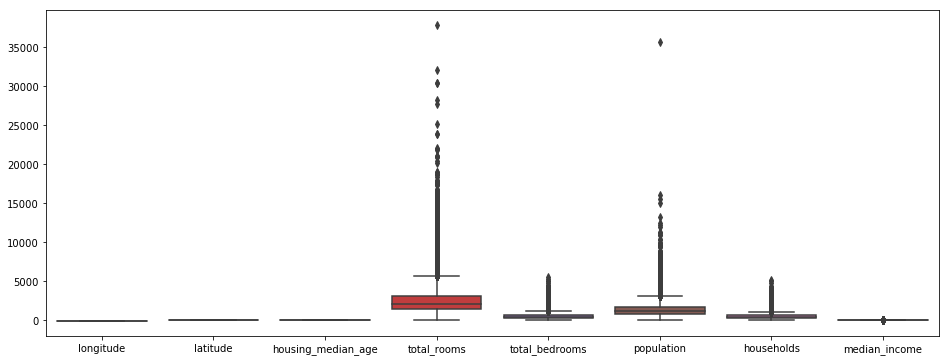

In [166]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df2)

<function matplotlib.pyplot.show(*args, **kw)>

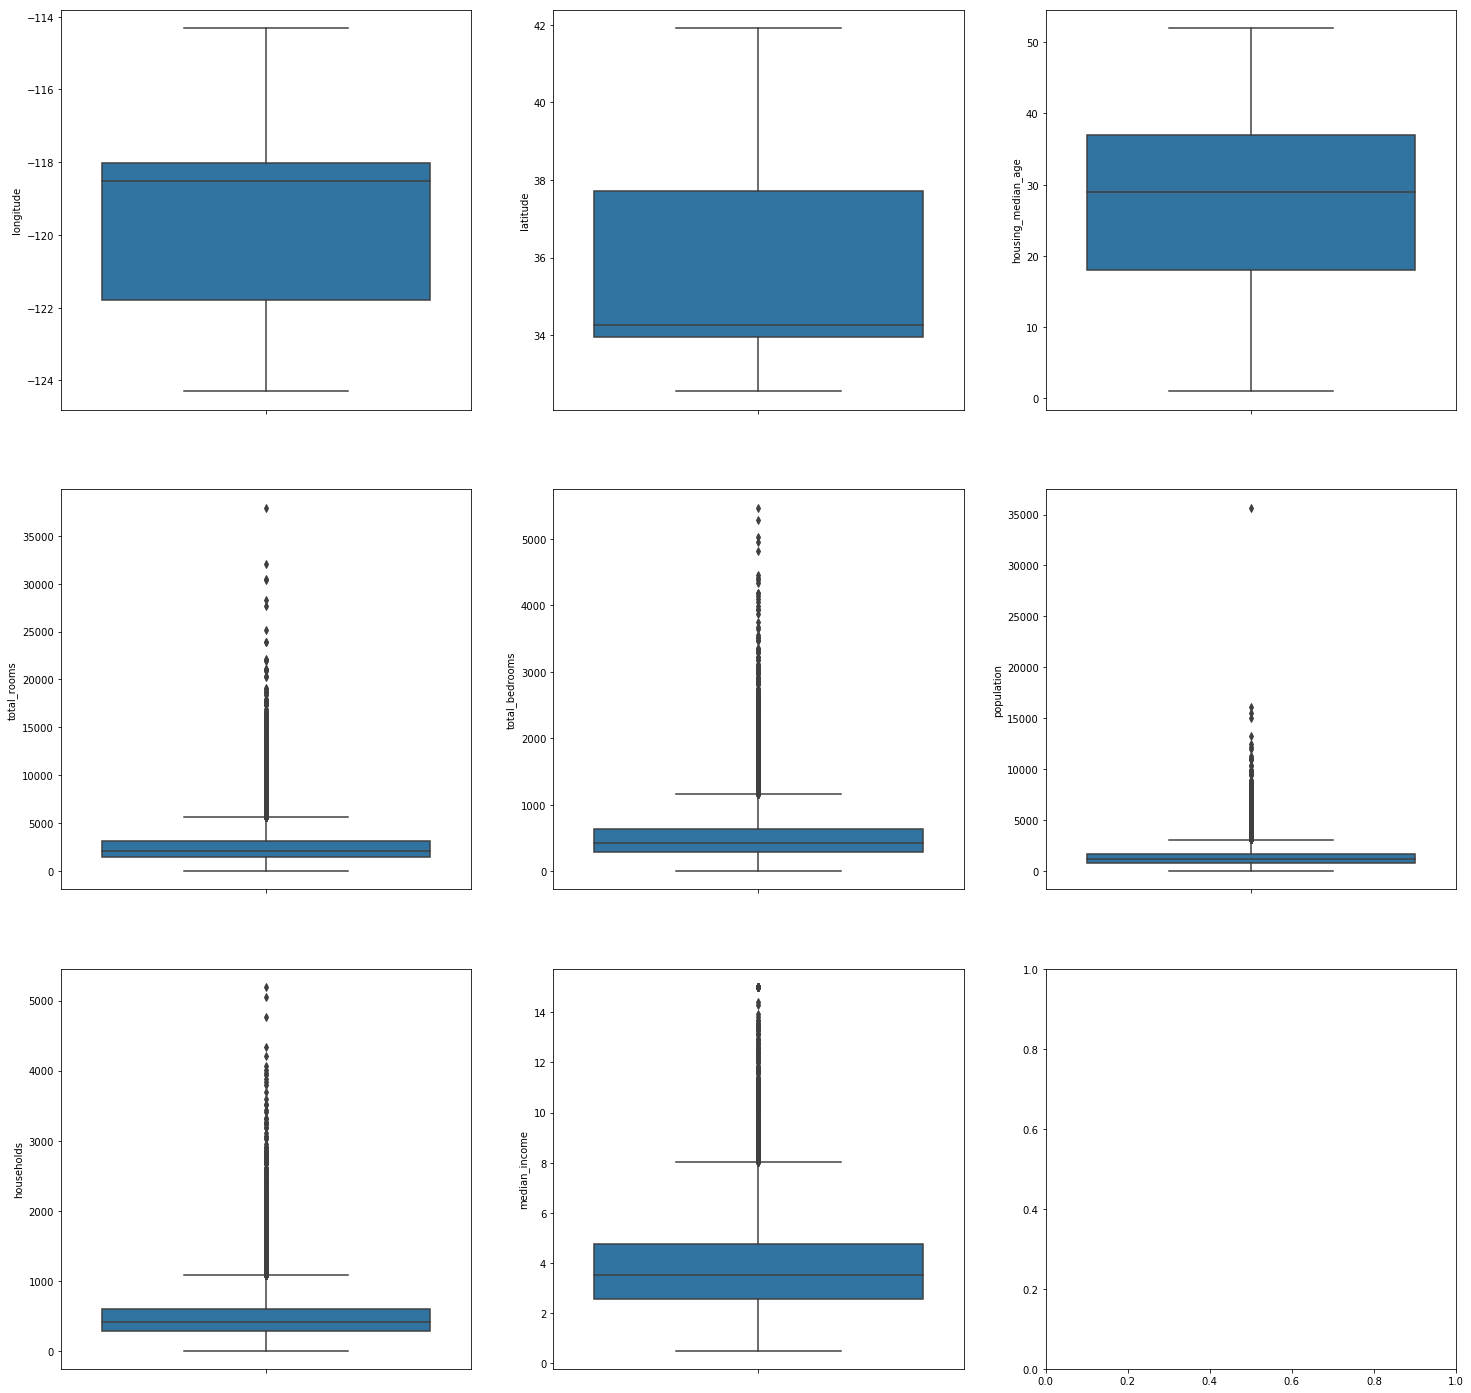

In [167]:
plt.rcParams["figure.figsize"] = [25.00,25.00]

linha = 0
coluna = 0
f, axes = plt.subplots(3,3)
for i in num_attrib:
    sns.boxplot(data = df2, y=i,ax=axes[linha][coluna])
    coluna +=1
    if coluna == 3:
        linha += 1
        coluna = 0
plt.show